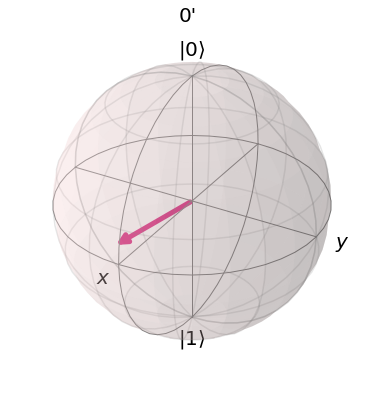

In [2]:
import numpy as np
import math
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize


from qiskit import(
  QuantumCircuit,
  execute,
  Aer)

#def base1_measurement(qc,qubit,cbit):

    #qc.rz(math.pi*(16/11),0)
    #qc.ry(math.pi*(0.73),0)
 
    #qc.measure(qubit,cbit)
    
    #qc.ry(math.pi*(0.73),0)
    #qc.rz(math.pi*(16/11),0)
    
    #return qc



def base2_measurement(qc,qubit,cbit):

    qc.rz(math.pi*(16/11),0)
    qc.ry(math.pi*(0.73),0)
 
    qc.rz(math.pi*(16/11),1)
    qc.ry(math.pi*(0.73),1)
 
 
    qc.measure(qubit,cbit)
    qc.measure(qubit+1,cbit+1)
    
    qc.ry(math.pi*(0.73),0)
    qc.rz(math.pi*(16/11),0)
    
    qc.ry(math.pi*(0.73),1)
    qc.rz(math.pi*(16/11),1)
    return qc



def base3_measurement(qc,qubit,cbit):
    qc.rz(math.pi*(16/11),1)
    qc.ry(math.pi*(0.73),1)

    qc.measure(qubit+1,cbit+1)
    
    qc.ry(math.pi*(0.73),1)
    qc.rz(math.pi*(16/11),1)
    return qc

#simulator =Aer.get_backend('statevector_simulator')
#result =execute(qc,simulator).result()
#statevector =result.get_statevector()
#plot_bloch_multivector(statevector)

%matplotlib inline

bloch_vector = [math.sin(math.pi*0.73)*math.cos((16/11)*math.pi), math.sin(math.pi*0.73)*math.sin((16/11)*math.pi), math.cos(math.pi*0.73)] 
plot_bloch_vector(bloch_vector, title= "0'")


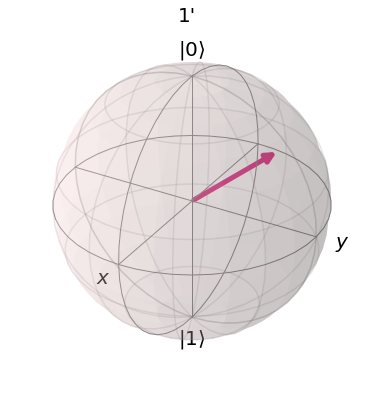

In [3]:
bloch_vector2 = [math.sin(-math.pi*0.27)*math.cos((16/11)*math.pi), math.sin(-math.pi*0.27)*math.sin((16/11)*math.pi), math.cos(-math.pi*0.27)] 
plot_bloch_vector(bloch_vector2, title= "1'")


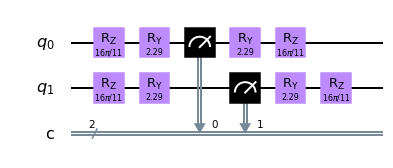

In [4]:
# 1.1
# circuito pra medir na base {0',1'}
qc = QuantumCircuit(2,2)


base2_measurement(qc, 0, 0)

qc.draw(output='mpl')


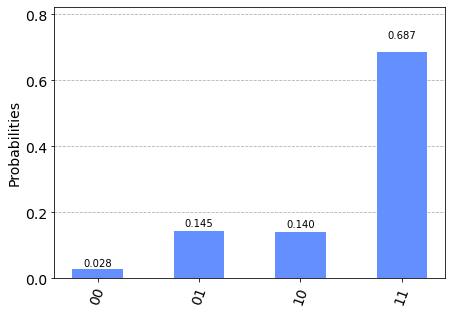

In [5]:
# 1.2
# medidas de 0  na base {0',1'}


    
backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc,backend,shots=10000).result()
counts = result2.get_counts()

plot_histogram(counts)


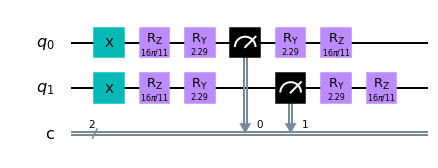

In [6]:
# 1.2
# medidas de 1 na base {0',1'}

qc = QuantumCircuit(2,2)


qc.x(0)
qc.x(1)
base2_measurement(qc, 0, 0)
#qc.x(0)

qc.draw(output='mpl')



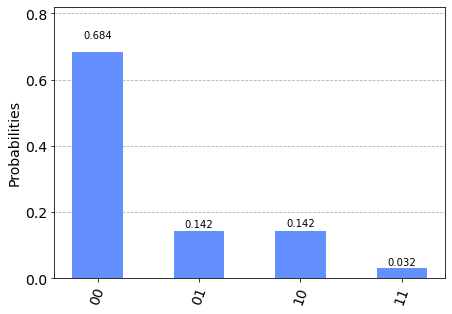

In [7]:
# 1.2
# medidas de 1 na base {0',1'}


    
backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc,backend,shots=10000).result()
counts = result2.get_counts()

plot_histogram(counts)


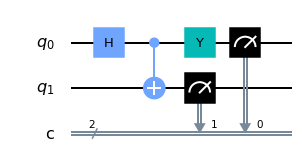

In [9]:
# 2.1
#estado de bell phi+
qc2 = QuantumCircuit(2,2)

qc2.h(0)
qc2.cx(0,1)
qc2.y(0)

qc2.measure(0,0)
qc2.measure(1,1)

qc2.draw(output='mpl')

#1/raiz2 0 0 1/raiz2



In [ ]:
# 2.2 i
#medidas phi+ na base computacional 
#qc2.measure([0,1], [0,1])

backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc2,backend,shots=10000).result()
counts = result2.get_counts()

plot_histogram(counts)

In [ ]:
#estado de bell phi+ na base {0',1'}

qc3 = QuantumCircuit(2,2)

#base2_measurement(qc3, 0, 0)

qc3.h(0)
qc3.cx(0,1)

base2_measurement(qc3, 0, 0)

qc3.draw(output='mpl')
#1/raiz2 0 0 1/raiz2


In [ ]:
# 2.2 ii
##medidas phi+ na base {0',1'}
#qc3.measure([0,1], [0,1])


backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc3,backend,shots=10000).result()
counts = result2.get_counts()

plot_histogram(counts)

In [ ]:
# 2.3
#estado de bell psi-
qc4 = QuantumCircuit(2,2)

qc4.h(0)
qc4.cx(0,1)
qc4.z(0)
qc4.x(1)

qc4.measure(0,0)
qc4.measure(1,1)

qc4.draw(output='mpl')
#0 1/raiz2 1/raiz2  0

In [ ]:
# 2.4 i
##medidas psi- na base computacional
#qc4.measure([0,1], [0,1])

backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc4,backend,shots=10000).result()
counts = result2.get_counts()

plot_histogram(counts)

In [ ]:
#psi-na base {0',1'}

qc5 = QuantumCircuit(2,2)

#base2_measurement(qc5, 0, 0)

qc5.h(0)
qc5.cx(0,1)
qc5.z(0)
qc5.x(1)

base2_measurement(qc5, 0, 0)

qc5.draw(output='mpl')
#0 1/raiz2 1/raiz2  0

In [ ]:
# 2.4 ii
#medidas psi- na base {0',1'}
#qc5.measure([0,1], [0,1])

backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc5,backend,shots=10000).result()
counts = result2.get_counts()

plot_histogram(counts)

In [ ]:
# 2.5
# psi-na base computacional e base {0',1'}
qc6 = QuantumCircuit(2,2)

#base3_measurement(qc6, 0, 0)

qc6.h(0)
qc6.cx(0,1)
qc6.z(0)
qc6.x(1)

qc6.measure(0,0)

base3_measurement(qc6, 0, 0)

#qc6.measure(0,0)

qc6.draw(output='mpl')
#0 1/raiz2 1/raiz2  0

In [ ]:
##medidas na base computacional e base {0',1'}
#qc6.measure([0,1], [0,1])

backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc6,backend,shots=10000).result()
counts = result2.get_counts()

plot_histogram(counts)